<a href="https://colab.research.google.com/github/jinwook8910/quant/blob/main/backtest2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install pykrx

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import pykrx.stock  as  stock 
import matplotlib

In [9]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconf

In [10]:
backtestdata = pd.read_excel('mok_backtest.xlsx', index_col=0) #pd로 읽어주기
backtestdata

,Last Refresh: 2022-05-03 22:12:03,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 591,Unnamed: 592,Unnamed: 593,Unnamed: 594,Unnamed: 595,Unnamed: 596,Unnamed: 597,Unnamed: 598,Unnamed: 599,Unnamed: 600
Calendar Basis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Portfolio,,Default,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frequency,일간,KRW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Non-Trading Day,Previous,Asc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-27 00:00:00,65000,11.25079,1.49044,418000,105.4863,10.49445,108500,8.22596,1.2254,810000,...,0.81458,59300,6.99946,0.36694,18400,4.51795,0.70022,6840,147.89189,0.4457
2022-04-28 00:00:00,64800,11.21618,1.48585,417500,105.36012,10.4819,109500,8.30178,1.23669,835000,...,0.83286,59800,7.05848,0.37004,18550,4.55479,0.70593,6860,148.32432,0.447
2022-04-29 00:00:00,67400,11.66621,1.54547,417000,105.23394,10.46934,112500,8.52922,1.27058,838000,...,0.79712,60400,7.1293,0.37375,18700,4.59162,0.71164,6870,148.54054,0.44765
2022-05-02 00:00:00,67300,11.6489,1.54318,408500,103.08888,10.25594,110500,8.37759,1.24799,838000,...,0.82123,60000,7.08209,0.37127,19150,4.70211,0.72876,6910,149.40541,0.45026


In [11]:
df_df = backtestdata # df_df 라는 이름에 아까 불러온 데이터를 저장해줍니다.

df_df = df_df.drop(index = 'Symbol Name')
df_df = df_df.drop(index = 'Kind')
df_df = df_df.drop(index = 'Item')

df_df = df_df.iloc[6:]


In [12]:


df_df = df_df.drop(index = 'Frequency')

df_df = df_df.transpose()

df_df = df_df.set_index(['Symbol', 'Item Name'])



In [13]:
df_index = ['수정주가(원)','PER(배)','PBR(배)'] # 편의를 위해 df_index라는 리스트에 인덱스명을 저장해줍시다.

price_data = df_df.xs(df_index[0], level = 1).iloc[:].transpose()
# df_df의 [df_index[0] <= (수정주가(원)] 라는 이름을 가진 항목들만 따로 빼서, price에 데이터프레임으로 저장해줍니다.

price_data

Symbol,A005930,A373220,A000660,A207940,A035420,A006400,A005380,A035720,A051910,A000270,...,A020000,A001680,A003000,A006120,A284740,A000070,A064960,A057050,A192400,A002350
2010-01-01,15980,NaN,23150,NaN,60269,148500,121000,14166,228500,20050,...,16100,7950,5667,40188,NaN,46309,29800,NaN,NaN,6760
2010-01-04,16180,NaN,24100,NaN,60583,148000,119000,14791,224000,20800,...,16150,7820,5743,39345,NaN,46517,29100,NaN,NaN,6650
2010-01-05,16440,NaN,23350,NaN,60583,144000,110000,14912,222500,19650,...,16300,7760,5686,40067,NaN,46257,29500,NaN,NaN,6450
2010-01-06,16820,NaN,24550,NaN,60269,144500,111000,14972,222500,19850,...,16550,7940,5761,41932,NaN,45894,29400,NaN,NaN,6410
2010-01-07,16260,NaN,24400,NaN,60426,137000,106000,14791,213000,18950,...,16350,7870,5856,40910,NaN,45167,28600,NaN,NaN,6250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-27,65000,418000,108500,810000,280500,590000,187000,88400,463000,83300,...,35550,25400,11500,41050,34200,86400,49000,59300,18400,6840
2022-04-28,64800,417500,109500,835000,280500,598000,188500,89300,502000,83700,...,35900,25300,11650,41200,34800,86200,50100,59800,18550,6860
2022-04-29,67400,417000,112500,838000,286500,611000,186000,89900,519000,83800,...,35500,25400,11900,41400,35100,86900,47950,60400,18700,6870
2022-05-02,67300,408500,110500,838000,281000,611000,187000,87300,526000,84400,...,35850,25200,11900,42200,35150,86200,49400,60000,19150,6910


In [14]:
per = df_df.xs(df_index[1], level = 1).iloc[:].transpose()
per


Symbol,A005930,A373220,A000660,A207940,A035420,A006400,A005380,A035720,A051910,A000270,...,A020000,A001680,A003000,A006120,A284740,A000070,A064960,A057050,A192400,A002350
2010-01-01,8.60407,NaN,5.21369,NaN,19.5328,19.67317,6.20479,7.5672,7.82398,2.9358,...,5.53855,9.0799,14.603,7.1063,NaN,3.90106,13.2043,NaN,NaN,6.39612
2010-01-04,8.71176,NaN,5.42765,NaN,19.63453,19.60693,6.10224,7.90088,7.6699,3.04562,...,5.55575,8.93143,14.79706,6.95737,NaN,3.91855,12.89414,NaN,NaN,6.29205
2010-01-05,8.85175,NaN,5.25874,NaN,19.63453,19.07702,5.64072,7.96547,7.61854,2.87723,...,5.60735,8.8629,14.65152,7.08502,NaN,3.89668,13.07137,NaN,NaN,6.10281
2010-01-06,9.05635,NaN,5.52899,NaN,19.5328,19.14326,5.692,7.99776,7.61854,2.90651,...,5.69335,9.06848,14.84558,7.41481,NaN,3.86607,13.02706,NaN,NaN,6.06496
2010-01-07,8.75483,NaN,5.49521,NaN,19.58367,18.14966,5.4356,7.90088,7.29325,2.77473,...,5.62455,8.98853,15.08815,7.23396,NaN,3.80484,12.67259,NaN,NaN,5.91358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-27,11.25079,105.4863,8.22596,136.16626,2.79383,35.49801,10.47832,28.22478,9.87637,7.09319,...,7.64325,6.34727,NaN,3.9327,5.04429,3.22348,8.94338,6.99946,4.51795,147.89189
2022-04-28,11.21618,105.36012,8.30178,140.36893,2.79383,35.97934,10.56237,28.51213,10.70829,7.12725,...,7.7185,6.32228,NaN,3.94707,5.13279,3.21602,9.14415,7.05848,4.55479,148.32432
2022-04-29,11.66621,105.23394,8.52922,140.87325,2.85359,36.7615,10.42229,28.7037,11.07092,7.13577,...,7.6325,6.34727,NaN,3.96623,5.17704,3.24214,8.75174,7.1293,4.59162,148.54054
2022-05-02,11.6489,103.08888,8.37759,140.87325,2.79881,36.7615,10.47832,27.87356,11.22024,7.18686,...,7.70775,6.29729,NaN,4.04287,5.18441,3.21602,9.01639,7.08209,4.70211,149.40541


In [15]:

pbr = df_df.xs(df_index[2], level = 1).iloc[:].transpose()
pbr

Symbol,A005930,A373220,A000660,A207940,A035420,A006400,A005380,A035720,A051910,A000270,...,A020000,A001680,A003000,A006120,A284740,A000070,A064960,A057050,A192400,A002350
2010-01-01,1.45617,NaN,1.72844,NaN,4.71785,1.12467,1.11371,2.63587,2.18762,0.79788,...,0.67664,0.60827,1.92878,1.33104,NaN,0.37166,1.02481,NaN,NaN,1.40981
2010-01-04,1.4744,NaN,1.79937,NaN,4.74242,1.12088,1.0953,2.7521,2.14454,0.82772,...,0.67874,0.59833,1.95442,1.30314,NaN,0.37333,1.00073,NaN,NaN,1.38687
2010-01-05,1.49809,NaN,1.74337,NaN,4.74242,1.09059,1.01247,2.7746,2.13018,0.78196,...,0.68505,0.59373,1.93519,1.32705,NaN,0.37125,1.01449,NaN,NaN,1.34516
2010-01-06,1.53272,NaN,1.83297,NaN,4.71785,1.09437,1.02167,2.78584,2.13018,0.78992,...,0.69556,0.60751,1.96082,1.38882,NaN,0.36833,1.01105,NaN,NaN,1.33681
2010-01-07,1.48169,NaN,1.82177,NaN,4.73014,1.03757,0.97565,2.7521,2.03923,0.7541,...,0.68715,0.60215,1.99286,1.35495,NaN,0.3625,0.98354,NaN,NaN,1.30345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-27,1.49044,10.49445,1.2254,10.73784,1.87042,2.75929,0.67296,3.94757,1.66933,0.96088,...,0.69492,0.74567,2.5507,0.34279,1.1876,0.43501,0.81458,0.36694,0.70022,0.4457
2022-04-28,1.48585,10.4819,1.23669,11.06925,1.87042,2.7967,0.67836,3.98776,1.80994,0.96549,...,0.70177,0.74273,2.58397,0.34404,1.20843,0.43401,0.83286,0.37004,0.70593,0.447
2022-04-29,1.54547,10.46934,1.27058,11.10902,1.91042,2.8575,0.66937,4.01455,1.87124,0.96664,...,0.69395,0.74567,2.63942,0.34571,1.21885,0.43753,0.79712,0.37375,0.71164,0.44765
2022-05-02,1.54318,10.25594,1.24799,11.10902,1.87375,2.8575,0.67296,3.89845,1.89648,0.97356,...,0.70079,0.7398,2.63942,0.35239,1.22059,0.43401,0.82123,0.37127,0.72876,0.45026


In [16]:

#백테스트 실행


money = 100000000 #기초 금액을 설정해줍니다.
day = 1 #시작 날짜가 위치한 인덱스 위치 입니다.

back = None 
backsum = None


rebalancing = 30
# 리밸런싱 날짜를 뜻합니다. 저는 30(영업일)로 해 둘게요.
plot = rebalancing

In [17]:
for daycod in range(0,int((len(price_data)-day)/rebalancing)): # 총 몇번의 리밸런싱이 있을지 계산해줍니다.

    # 스크리닝
    
    # 내 전략은 PBR을 기준으로 내림차순 하고, 0.25보다 이상인 종목을 30개를 뽑는다.
    # 그 종목들의 PER을 가져와서 다시 내림차순을 해서 20개 종목을 뽑는다. 
    # 사실 이때 만약 그 회사가 지주사거나 섹터별로 겹치는 것이 있다면 제외하고 다른 우선순위를 고르지만, 그 부분은 구현하지 못했다. 
    
    # 투자할 종목을 스크리닝을 미리 해 둬야 투자를 하겠죠?
    # 스크리닝 과정과 아예 똑같은 부분은 각주 다는 것을 생략하도록 하겠습니다.
    # 목) 스크리닝할때, per과 pbr을 보려한다. 
    # per에 대해, 시작 날짜의 행을 iloc로 가져와서 그 하나의 행만 따로 new_per에 저장한다.이때 per의 colums가 new_per의 인덱스가 되면서 자동 transform된다.
    new_per = per.iloc[day]
    new_pbr = pbr.iloc[day]  # 스크리닝을 위해 사용할 기준 per과 pbr이 되는 것이다. 평균이 아닌 당일기준 지수를 사용한 방법이다.

    # 새로운 데이터 프레임을 만든다. 
    new_data = pd.DataFrame({'new_per': new_per, 'new_pbr': new_pbr})
    new_data = new_data.dropna()
    new_data = new_data[new_data['new_per'] > 0]
    new_data = new_data[new_data['new_pbr'] >= 0.25]  # pbr을 0.25이상만 남긴다.


    # rank()함수는 순위를 매겨줍니다. 오름차순 내림차순으로 정렬시켜준다.
    # https://hogni.tistory.com/48
    
    # 나는 rank의 옵션에서 first를 사용해 지수가 같은 경우 이름 순으로 등수를 차등하기로 했다.
    # rank는 기본 설정이 ascending=True로 오름차순 정렬을 한다. 즉 수치가 가장 낮은것이 1등이다.
    new_data = new_data.sort_values(by='new_pbr')  # 0.25이상인 종목들을 pbr 기준으로 내림차순 정렬하고,
    new_data = new_data.iloc[:50]  # 상위 50개만 추출한다.

    # 나는 rank의 옵션에서 first를 사용해 지수가 같은 경우 이름 순으로 등수를 차등하기로 했다.
    # rank는 기본 설정이 ascending=True로 오름차순 정렬을 한다. 즉 수치가 가장 낮은것이 1등이다.

    new_data['per_rank'] = new_data['new_per'].rank(method='min')  # (예: 두 명이 공동 1등이라면 둘 다 1등으로 처리)
    new_data['pbr_rank'] = new_data['new_pbr'].rank(method='min')

    new_data = new_data.sort_values(by='new_per')  # 추출된 30개 종목을 per 기준으로 내림차순 정렬하고,
    back_data = new_data.iloc[:20]  # 최종 상위 20개만 추출한다.

    mmt_list = back_data.index

    final_mmt_list = []

    # 이제 여기서 종가 데이터가 있는 종목인지 확인해 볼 필요가 있겠죠?
    for i in range(0, len(mmt_list)):  # mmt리스트의 길이만큼 i를 반복
        if mmt_list[i] in price_data:  # mmt리스트의 i번째 항목이 price 에 포함되어있는지?
            final_mmt_list.append(mmt_list[i])  # 포함되어있다면 final_mmt_list에 포함시켜라.
        else:  # 아니라면?
            pass  # 패스

    final_price_data = price_data[final_mmt_list]  # 최종적으로 스크리닝된 항목들만 final_price_data에 담아줍니다.
    # 그러면 종가데이터가 시작되는곳~ 끝부분 까지의 시계열을 가진  스크리닝 된 종목의 종가 데이터가 df로 나와요
    final_price_data = final_price_data.iloc[day:]

    mmt_price = final_price_data

    pf_stock_num = {}  # pf stock num 이라는 dict를 선언해줍시다.
    stock_amount = 0  # 나중에 쓰일거에요

    length = int(len(final_mmt_list))  # 우리가 총 몇개 종목에 투자하는지 체크해야합니다.
    print(length)
    each_money = int(money / length)  # 각자의 종목에 돈을 얼마나 투자할 것인지 확인해야 하기 때문이죠.
    # 따라서 each_money는 각각의 종목에 투자 가능한 금액을 뜻합니다.

    for code in mmt_price.columns:  # mmt_price의 컬럼수만큼(즉 최종  code를 반복합니다. 지금 mmt_price의 각각의 colum들은 종목symbol을 나타냅니다.
        temp = int(each_money / mmt_price[code][0])  # 그(code) 종목 몇개 살건데?를 계산해줍니다. // 여기 행렬이 순서가 맞나? [0][code]아닌가.
        pf_stock_num[code] = temp  # 아까 선언한 dict에 저장해줍시다. code 를 temp개 살거라고 저장해두는 겁니다.
        stock_amount = stock_amount + temp * mmt_price[code][0]  # 가격 x temp개 를 각각 다 더해주면 투자금액이 될 것입니다.

    cash_amount = money - stock_amount

    stock_pf = 0

    for code in final_mmt_list:  # mmt_price의 컬럼만큼 반복해라. Code는 종목코드가 돌아간다고 보심 됩니다.
        stock_pf = stock_pf + mmt_price[code] * pf_stock_num[code]  # 종가 * 수량 하면 그 날의 수익이 나와요

    # 포트폴리오의 수익을 계산하기 위한 과정이라 보시면 될거에요.


    # 이제 거의 다 끝났습니다. 
    #여기는 데이터프레임의 새로운 열이나 행을 만드는 방법인것 같다. stock_pf가 어떻게 배열처럼 되어있나,
    back = pd.DataFrame({'종목':stock_pf[:rebalancing]}) #아까 뽑아낸 데이터는 투자시작일~~~~ 계속
    #인데, 우리가 필요한 데이터는 투자시작일~ 리밸런싱날짜 까지 입니다. 따라서 back이란 df에 저장할 때에는
    # : rebal 의 코드를 사용해서 여기까지만 저장한다고 하는것입니다.
    back['현금'] = [cash_amount] * len(back)
    # 잔액을 넣어주는 코드입니다. (현금 보유량)
    back['종합'] =back['종목'] + back['현금'] # 현금 + 주식
    back['일별수익률'] = back['종합'].pct_change() # 수익률 계산
    back['총수익률'] = back['종합']/money - 1 #총수익률 계산
    
    # 이렇게 나온 back 이라는 데이터프레임을 for 문으로 돌리면서 계~속 구해줄거에요.
    #구해준 for 문을 따로 저장할 곳이 필요한데, 그걸 backsum에 저장해줄 것입니다.
    # concat을 활용해서 저장해볼게요.
    backsum = pd.concat([backsum, back]) #backsum을 통해서 계속 이어붙여줍니다.
    money = back.iloc[-1,2] # 재투자금액은 맨 마지막의 종합금액입니다.
    
    print(back.index[0]) # 날짜를 print 하기 위함입니다.
    print('스크리닝 종목')
    print(mmt_list.tolist()) #스크리닝 된 종목을 print 해줍니다.
    money = money * (1-0.0025) # 이거는 세금을 계산해주는 코드에요.
    
    day = day + rebalancing #리밸런싱을 해야합니다. 그래서 우리가 처음에 어떻게 스크리닝했는지 기억 나시나요?
    # day 라는 숫자를 활용했었죠?
    # 리밸런싱을 day에 더해주는 것만으로도 그 다음 투자기간으로 갈 수 있습니다. (for 문으로 돌아가기에)
    
    # 백테스트가 끝났습니다.

#%%

20
2010-01-04 00:00:00
스크리닝 종목
['A011780', 'A017800', 'A003240', 'A005850', 'A042660', 'A000270', 'A009540', 'A000880', 'A000150', 'A006040', 'A103140', 'A000070', 'A006650', 'A078930', 'A010620', 'A004490', 'A009830', 'A011170', 'A000670', 'A019170']
20
2010-02-15 00:00:00
스크리닝 종목
['A011780', 'A017800', 'A003240', 'A005850', 'A000880', 'A000270', 'A000070', 'A006650', 'A103140', 'A004490', 'A120110', 'A000670', 'A078930', 'A011170', 'A009830', 'A020000', 'A010620', 'A019170', 'A005250', 'A011790']
20
2010-03-29 00:00:00
스크리닝 종목
['A017800', 'A003240', 'A011780', 'A000880', 'A005850', 'A120110', 'A000070', 'A006650', 'A004490', 'A103140', 'A009830', 'A078930', 'A011170', 'A020000', 'A019170', 'A111770', 'A000670', 'A005250', 'A011790', 'A010620']
20
2010-05-10 00:00:00
스크리닝 종목
['A017800', 'A003240', 'A000880', 'A005850', 'A006040', 'A000070', 'A006650', 'A078930', 'A004490', 'A000670', 'A019170', 'A103140', 'A020000', 'A009830', 'A111770', 'A005250', 'A011170', 'A010620', 'A003850', 'A0

In [21]:
backsum

,종목,현금,종합,일별수익률,총수익률,max,mdd,mdd2
2010-01-04,98528313,1.471687e+06,1.000000e+08,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
2010-01-05,97797577,1.471687e+06,9.926926e+07,-0.007307,-0.007307,1.000000e+08,-7.307360e+05,-0.007307
2010-01-06,100024859,1.471687e+06,1.014965e+08,0.022437,0.014965,1.000000e+08,-7.307360e+05,-0.007307
2010-01-07,101704164,1.471687e+06,1.031759e+08,0.016545,0.031759,1.014965e+08,0.000000e+00,0.000000
2010-01-08,103390633,1.471687e+06,1.048623e+08,0.016346,0.048623,1.031759e+08,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...
2022-04-18,1407943450,1.117182e+06,1.409061e+09,-0.000539,13.090606,1.560053e+09,-2.978647e+08,-0.190932
2022-04-19,1428049730,1.117182e+06,1.429167e+09,0.014269,13.291669,1.560053e+09,-2.978647e+08,-0.190932
2022-04-20,1432266770,1.117182e+06,1.433384e+09,0.002951,13.333840,1.560053e+09,-2.978647e+08,-0.190932
2022-04-21,1442633160,1.117182e+06,1.443750e+09,0.007232,13.437503,1.560053e+09,-2.978647e+08,-0.190932


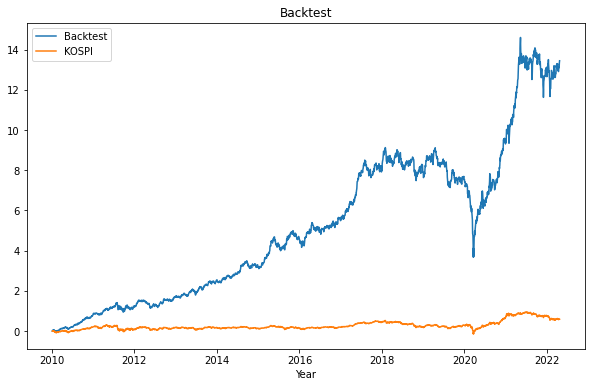

In [20]:
kospi  =  stock.get_market_ohlcv_by_date ( backsum.index[0], backsum.index[-1] ,  'kospi' ,  freq = 'd' ) [[ '종가' ]] 
# 코스피를 불러와줍시다. BM개념으로요
# https://wikidocs.net/47449 
kospi['총수익률'] = kospi['종가'] / kospi['종가'][0] -1
# 코스피도 총수익률을 계산해줍시다.
backsum['총수익률'] = backsum['종합']/backsum['종합'][0] -1
# backsum 의 총수익률을 다시 계산해줘야해요. (back를 계속 이어붙였으니,,,)


# 그림을 그려줍니다.
# https://wikidocs.net/92071
plt.figure(figsize = (10,6))
plt.plot(backsum['총수익률'])
plt.plot(kospi['총수익률'])
plt.xlabel('Year')
plt.title('Backtest')
plt.legend(['Backtest','KOSPI'])

plt.show()


CAGR:  0.24921112306639848
mdd :  -0.5380340350393514


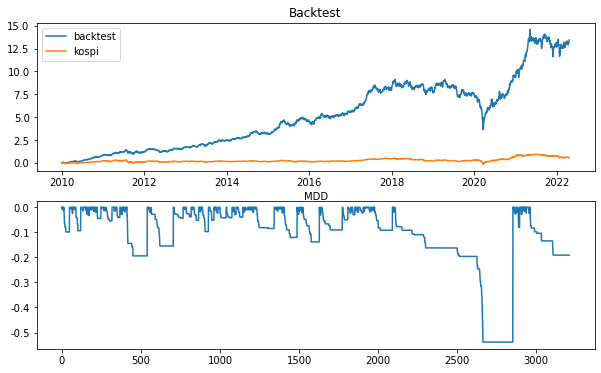

In [27]:

#%% mdd 이쁘게구하기 
max_list = [0]
mdd_list = [0]

# .max()는 데이터프레임의 최대값. .min()은 최솟값.  
# https://www.delftstack.com/ko/api/python-pandas/pandas-dataframe-dataframe.max-function/ 
for i in range(0,len(backsum)):
    max_list.append(backsum['종합'][:i].max())
    if max_list[-1] > max_list[-2]:
        mdd_list.append(0)
    else:
        mdd_list.append(min(backsum['종합'][i]-max_list[-1],mdd_list[-1]))
        
mdd_list = mdd_list[1:]
max_list = max_list[1:]

backsum['max'] = max_list
backsum['mdd'] = mdd_list
backsum = backsum.fillna(0)

mdd_list2 = [0]

for i in range(0,len(backsum)):
    if backsum['mdd'][i] == 0:
        mdd_list2.append(0)
    else:
        mdd_list2.append(backsum['mdd'][i]/backsum['max'][i])

mdd_list2 = mdd_list2[1:]

for i in range(0,len(mdd_list2)):
    if mdd_list2[i] > 0:
        mdd_list2[i] = mdd_list2[0] * -1

backsum['mdd2'] = mdd_list2
backsum = backsum.fillna(0)
#%%

plt.figure(figsize = (10,6))
plt.subplot(2,1,1)
plt.plot(backsum['총수익률'])
plt.plot(kospi['총수익률'])
plt.xlabel('MDD')
plt.title('Backtest')
plt.legend(['backtest','kospi']) # 범례, 왼쪽위의 그래프 설명 다는것.

plt.subplot(2,1,2)
plt.plot(mdd_list2)

#%%
money = 100000000
num_of_year = int(len(backsum)/252)

CAGR = (backsum.iloc[-1]['종합']/money)**(1/num_of_year) - 1
print("CAGR: ", CAGR)
print("mdd : ", min(backsum['mdd2']))
